Sara Saremi - 97243045

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
col_list = ["Date_reported", "New_cases",	 "Cumulative_cases",
            "New_deaths",	 "Cumulative_deaths"]
df=pd.read_csv('/content/drive/My Drive/WHO-COVID-19-Iran-data.csv', sep=",", usecols=col_list)
cases = df["Cumulative_cases"]
dates = df["Date_reported"]

داده‌ها از سایت سازمان بهداشت جهانی استخراج شده‌اند و از بخش تعداد مبتلایان (تجمعی) برای تحلیل استفاده شده‌است.

---



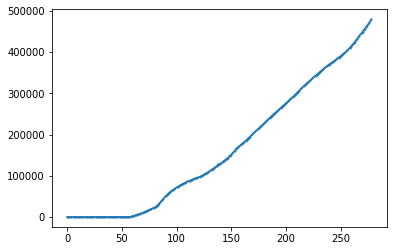

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
x = range(len(cases))
t = cases
plt.plot(x , t , marker='.', markerSize="2")

تقسیم داده‌ها به سه بخش:

70% train, 15% validation, 15% test

In [ ]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.15, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

trainSet, validationSet, testSet = train_validate_test_split(cases)
trainSet = trainSet.sort_index()
validationSet = validationSet.sort_index()
testSet = testSet.sort_index()

print(trainSet)
print(validationSet)
print(testSet)

1           0
2           0
3           0
4           0
5           0
        ...  
273    461044
274    464596
275    468119
277    475674
278    479825
Name: Cumulative_cases, Length: 195, dtype: int64
0           0
27          0
29          0
39          0
40          0
42          0
47          6
56        392
58        597
63       4751
66       7165
77      19644
80      23049
97      66220
100     71686
108     83505
112     88194
114     90481
125    103135
126    104691
129    109286
131    112725
136    122492
139    129341
153    160696
161    180176
183    235429
195    264561
198    271606
207    293606
209    298909
210    301530
212    306752
219    324692
220    326712
224    336324
225    338825
227    343203
228    345450
231    352558
244    378752
Name: Cumulative_cases, dtype: int64
7           0
18          0
24          0
26          0
28          0
38          0
46          0
49         22
57        597
59       1505
60       2340
68       9004
70      11368
81 

In [ ]:
import math 
      
class PolynomailRegression() : 
      
    def __init__( self, degree, learning_rate, iterations ) : 
        self.degree = degree 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
          
    def transform( self, X ) : 
        X_transform = np.ones( ( self.m, 1 ) ) 
        j = 0
        for j in range( self.degree + 1 ) :  
            if j != 0 :   
                x_pow = np.power( X, j )                   
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 ) 
  
        return X_transform    
            
    def normalize( self, X ) : 
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 ) 
        return X 
          
    def fit( self, X, Y ) : 
          
        self.X = X 
        self.Y = Y 
        self.m, self.n = self.X.shape 
      
        self.W = np.zeros( self.degree + 1 )           
        X_transform = self.transform( self.X ) 
        X_normalize = self.normalize( X_transform ) 
        cost = 0
        for i in range( self.iterations ) : 
            h = self.predict( self.X ) 
            error = h - self.Y 
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )  
        return self
            
    def predict( self, X ) :           
        X_transform = self.transform( X ) 
        X_normalize = self.normalize( X_transform ) 
        return np.dot( X_transform, self.W ) 
        

In [ ]:
def calc_error_cost(Y_pred):
  N = (len(validationSet))
  err = 0
  # for i in range(N):
  #   y = Y_pred[i]*validationSet[i]
  #   err = err + (y-validationSet[i])**2
  return err/(float(N)*2)

In [ ]:
trainArray =[]
for i in range(len(trainSet)):
  trainArray.append([i])
X = np.array( trainArray ) 
Y = np.array( trainSet ) 

degree 1 | cost:  0.0


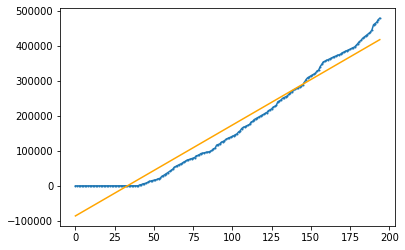

In [ ]:
model = PolynomailRegression( degree = 1, learning_rate = 0.01, iterations = 500 ) 
model.fit( X, Y ) 
Y_pred = model.predict( X ) 
print("degree 1 | cost: ", calc_error_cost(Y_pred))
plt.plot( X, Y, marker=".", markerSize="2" ) 
plt.plot( X, Y_pred, color = 'orange' ) 
plt.show() 

degree 1 | cost:  0.0


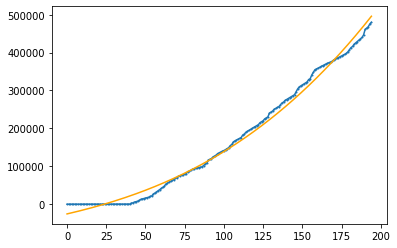

In [ ]:
model = PolynomailRegression( degree = 3, learning_rate = 0.01, iterations = 500 ) 
model.fit( X, Y ) 
Y_pred = model.predict( X ) 
print("degree 3 | cost: ", calc_error_cost(Y_pred))
plt.plot( X, Y, marker=".", markerSize="2" ) 
plt.plot( X, Y_pred, color = 'orange' ) 
plt.show() 

degree 1 | cost:  0.0


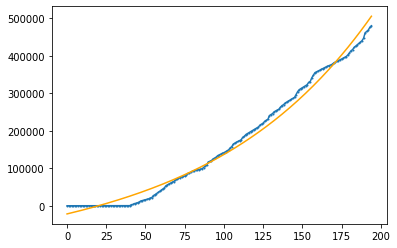

In [ ]:
model = PolynomailRegression( degree = 5, learning_rate = 0.01, iterations = 500 ) 
model.fit( X, Y ) 
Y_pred = model.predict( X ) 
print("degree 5 | cost: ", calc_error_cost(Y_pred))
plt.plot( X, Y, marker=".", markerSize="2" ) 
plt.plot( X, Y_pred, color = 'orange' ) 
plt.show() 

degree 1 | cost:  0.0


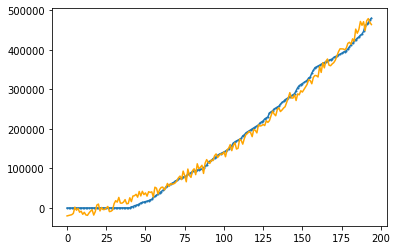

In [ ]:
model = PolynomailRegression( degree = 50, learning_rate = 0.01, iterations = 500 ) 
model.fit( X, Y ) 
Y_pred = model.predict( X ) 
print("degree 50 | cost: ", calc_error_cost(Y_pred))
plt.plot( X, Y, marker=".", markerSize="2" ) 
plt.plot( X, Y_pred, color = 'orange' ) 
plt.show() 

In [ ]:
def calc_cost(x, t, w, b):
  N = len(x)
  err = 0
  for i in range(N):
    y = w*x[i] + b
    err = err + (y-t[i])**2
  return err/float(N)